## **Problem Statement**

Predict the likelihood of an insurance claim:
1. Visualize the data and make sure it's reliable and clean.
2. Design and train machine learning models to predict the target.

**Data Dictionary**

age -  age of policyholder
<br>
sex - gender of policy holder (female=0, male=1)
<br>
bmi - Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 
<br>
steps - average walking steps per day of policyholder
<br>
children - number of children / dependents of policyholder
<br>
smoker - smoking state of policyholder (non-smoke=0;smoker=1)
<br>
region - the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
<br>
charges - individual medical costs billed by health insurance
<br>
insuranceclaim - yes=1, no=0

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

## Load dataset and simply analyze it

In [2]:
df = pd.read_csv('IncuranceClaim.csv')
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


### Simple information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


### check whether there is NULL value

In [4]:
df.isnull().sum()
### if there is NULL, we can do:
# medianFiller = lambda x: x.fillna(x.median())  or .fillna(0)
# df = df.apply(medianFiller,axis=0)
### to replace the NULL value by the media value or 0

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### More detail information of the dataset

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
steps,1338.0,5328.623318,2453.643236,3000.0000,3008.00000,4007.000,8004.000000,10010.00000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
insuranceclaim,1338.0,0.585202,0.492871,0.0000,0.00000,1.000,1.000000,1.00000


### Visualize the data distribution of each numeric column

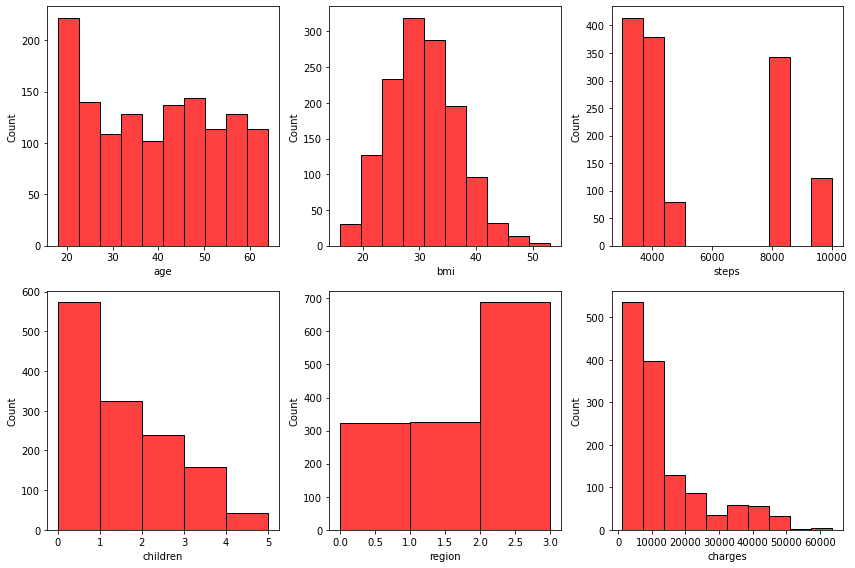

In [6]:
fig, ax =plt.subplots(2, 3, figsize=(12, 8))
sns.histplot(df['age'], ax=ax[0,0], bins=10, color='red')
sns.histplot(df['bmi'], ax=ax[0,1], bins=10, color='red')
sns.histplot(df['steps'], ax=ax[0,2], bins=10, color='red')
sns.histplot(df['children'], ax=ax[1,0], bins=df.children.max(), color='red')
sns.histplot(df['region'], ax=ax[1,1], bins=df.region.max(), color='red')
sns.histplot(df['charges'], ax=ax[1,2], bins=10, color='red')
fig.tight_layout()
fig.show()

### Visualize the relation between each pair of attributes

<Figure size 576x576 with 0 Axes>

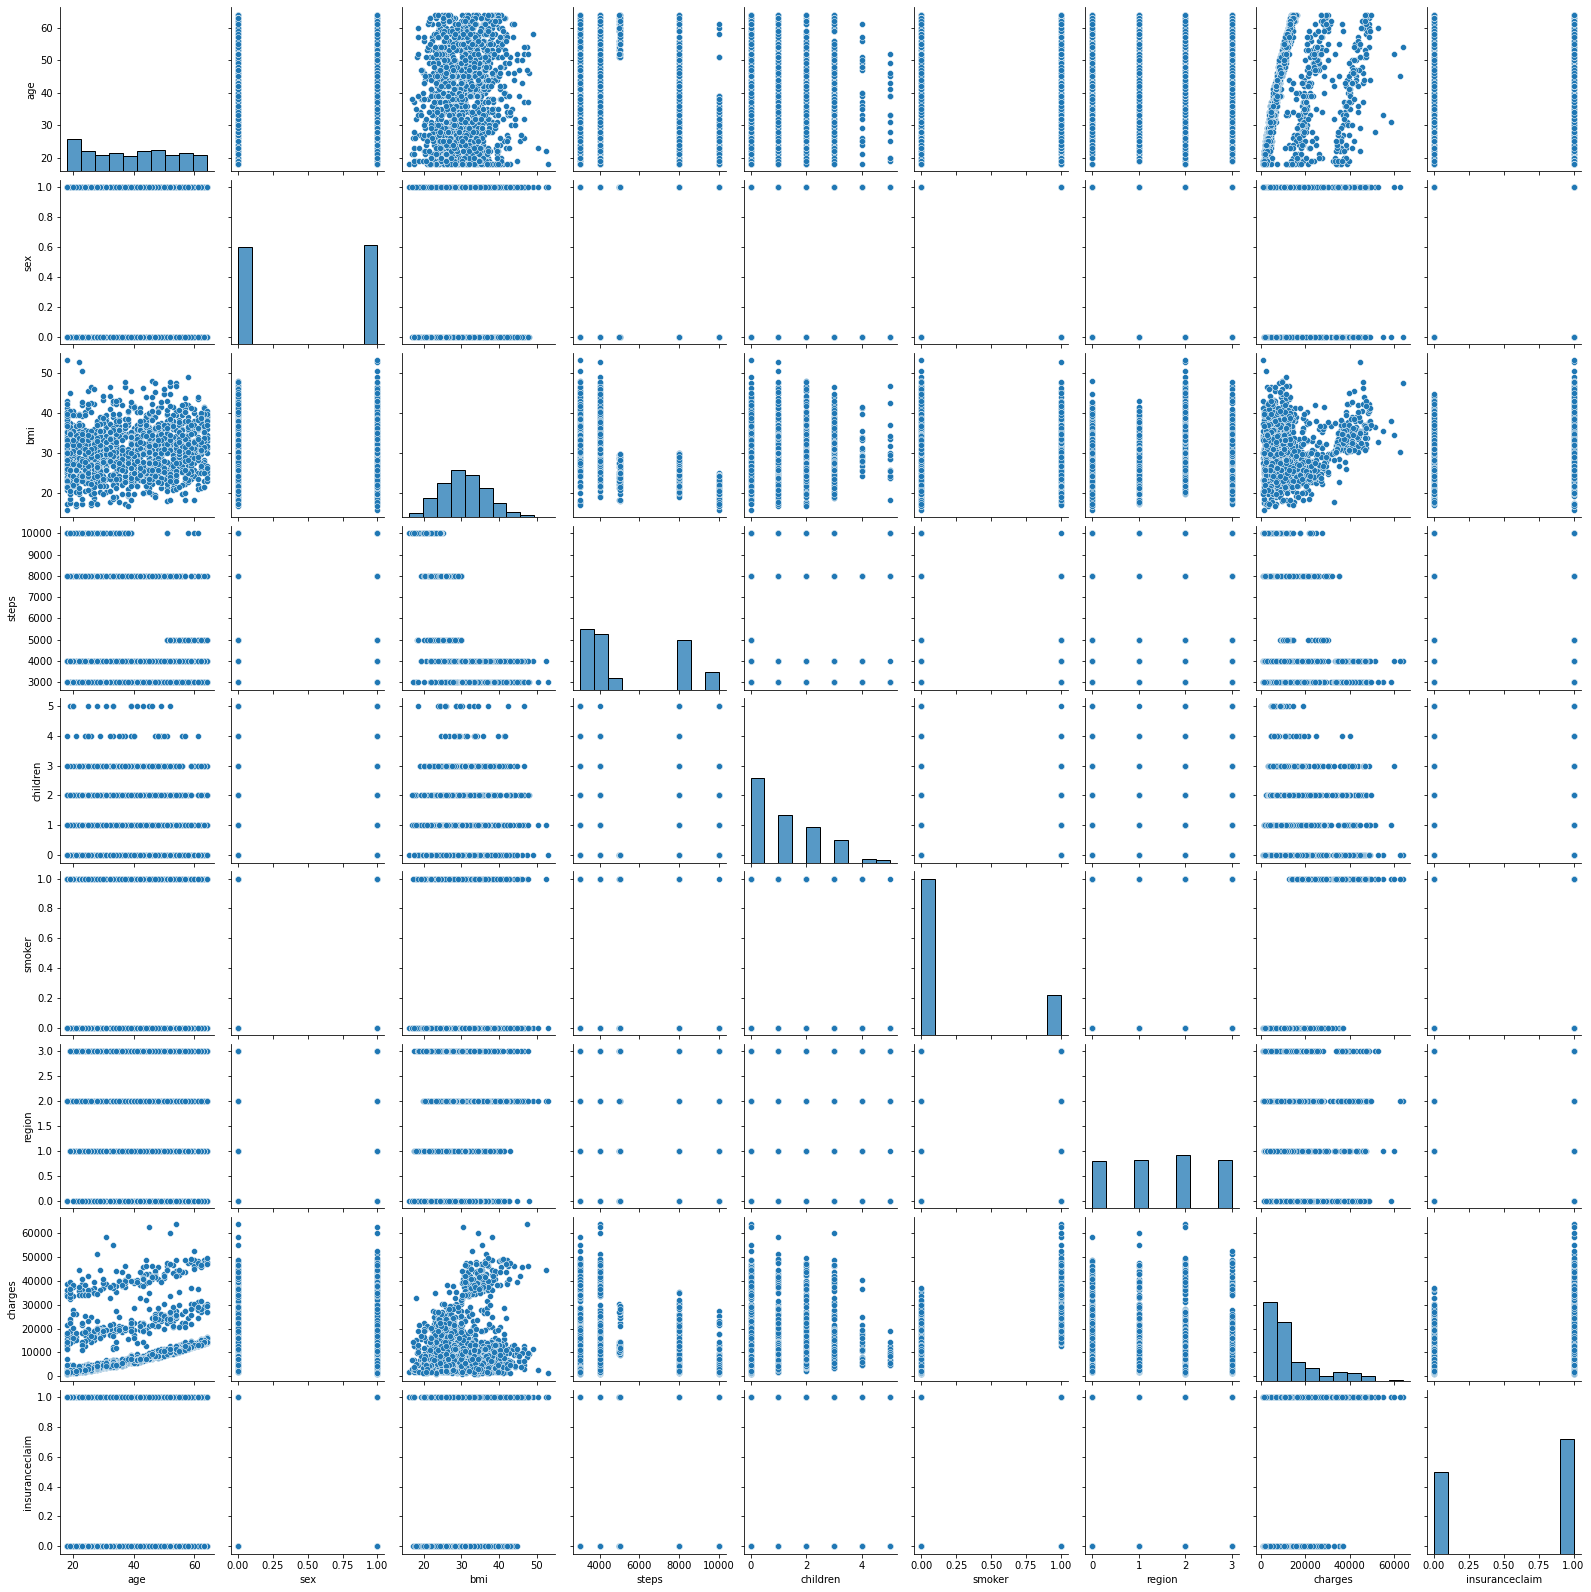

In [7]:
plt.figure(figsize = (8,8))
sns.pairplot(data=df,diag_kws={'bins':10})
plt.show()

### Correlation matrix

In [8]:
corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


### Heat map of correlation matrix

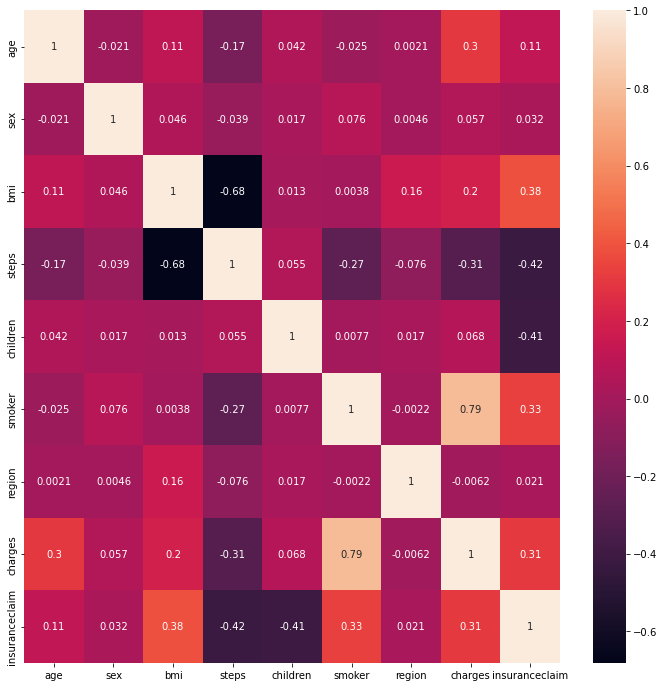

In [9]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Prepare dataset for Machine Learning Models
### Split the dataset into training and test dataset

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(["insuranceclaim"], axis=1)
Y = df["insuranceclaim"]
# if there is catorical features, we can nummerize them by pd.get_dummies()
# but this time all of the catorical features are already turned into number
# X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

### Standardize the training set for logistic regression and SVM

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_train_std = scaler.transform(X_train)
X_train_std=pd.DataFrame(X_train_std, columns=X.columns)

X_test_std = scaler.transform(X_test)
X_test_std=pd.DataFrame(X_test_std, columns=X.columns)

In [12]:
print("Shape of Training set : ", X_train_std.shape)
print("Shape of test set : ", X_test_std.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1003, 8)
Shape of test set :  (335, 8)
Percentage of classes in training set:
1    0.585244
0    0.414756
Name: insuranceclaim, dtype: float64
Percentage of classes in test set:
1    0.585075
0    0.414925
Name: insuranceclaim, dtype: float64


### Import metrics used for evaluating the models

In [13]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    make_scorer,
)

from sklearn.model_selection import GridSearchCV

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, annot=True,  fmt='.1f', xticklabels=['unclaim', 'claim'], yticklabels=['unclaim', 'claim'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the models**

Let's try to predict the likelihood of an insurance claim by the following model:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

### Logistic Regrsssion

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()

# hyperparameters
parameters = {
        'class_weight': ["balanced", None],
        'penalty': ['l2'], # since the solvers 'newton-cg' and 'lbfgs' can only deal with l2 penalty
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'C': [100, 10, 1.0, 0.1, 0.01]
        }

# scorer for tuning hyperparameters, here we use f1_score, but we can also use recall_score or precision_score
scorer = make_scorer(f1_score, pos_label = 1)

# grid search by 10-fold Cross-Validation 
gridCV = GridSearchCV(log_reg_model, parameters, scoring = scorer, cv = 10)
gridCV = gridCV.fit(X_train_std, y_train)

# update to best model
log_reg_model = gridCV.best_estimator_

#fit the logistic regression model
log_reg_model.fit(X_train_std, y_train)

LogisticRegression(C=0.1, solver='liblinear')

### Performance of train set (Logistic Regression)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       416
           1       0.89      0.92      0.90       587

    accuracy                           0.89      1003
   macro avg       0.89      0.88      0.88      1003
weighted avg       0.89      0.89      0.89      1003



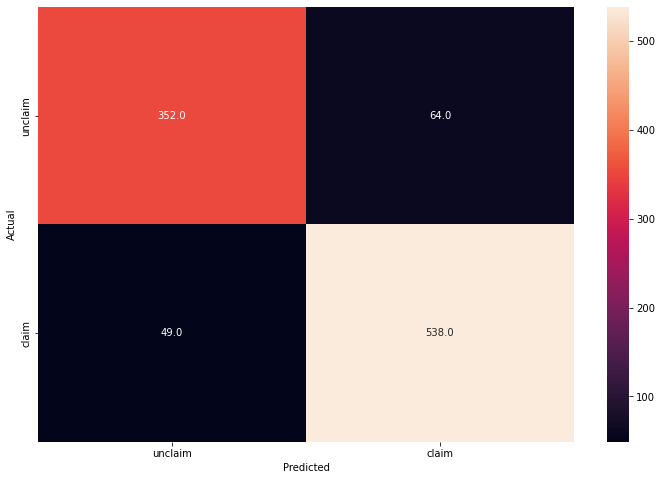

In [15]:
y_pred_train_log = log_reg_model.predict(X_train_std)
metrics_score(y_train, y_pred_train_log)

### Performance of test set (Logistic Regression)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       139
           1       0.91      0.91      0.91       196

    accuracy                           0.90       335
   macro avg       0.89      0.89      0.89       335
weighted avg       0.90      0.90      0.90       335



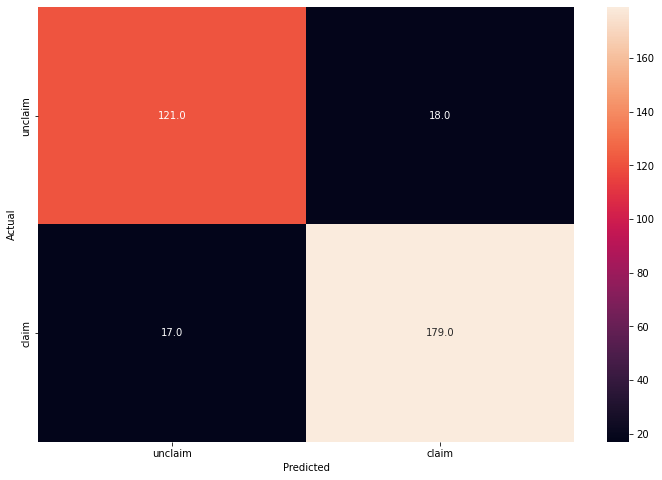

In [16]:
y_pred_test_log = log_reg_model.predict(X_test_std)
metrics_score(y_test, y_pred_test_log)

### Coefficient of each attribute

In [17]:
log_coef = pd.DataFrame(log_reg_model.coef_, columns=X.columns).T.sort_values(by = 0, ascending = False)
log_coef.rename(columns = {0:'coef'}, inplace = True)
log_coef

,coef
bmi,1.137705
smoker,1.118093
age,0.226480
charges,0.181288
sex,0.028557
region,-0.011538
steps,-0.073951
children,-1.381742


### Apply threshold to adjust the balance of precision and recall

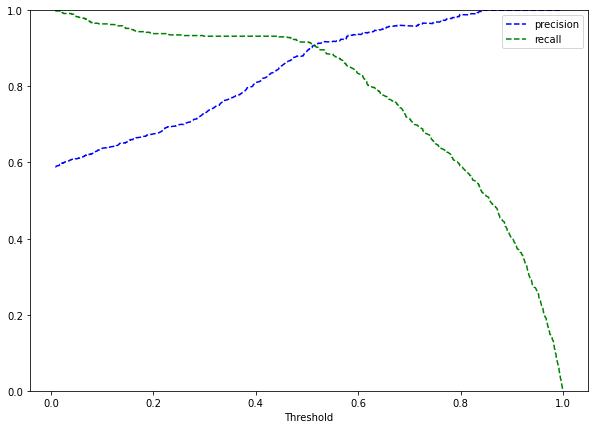

In [18]:
y_scores_lg = log_reg_model.predict_proba(X_train_std)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Visualize the trade off between precision and recall
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

### Find the balance point of precision and recall

In [19]:
match_indices = abs(precisions_lg - recalls_lg) <= 0.001
match_indices = np.where(match_indices == True)[0]
select_index = match_indices[match_indices.size//2]
print("The precision and recall match at about thresholds = ", thresholds_lg[select_index], ".")

The precision and recall match at about thresholds =  0.5146564507579267 .


### Let's use the threshold at balance point to adjust the model:

#### Performance of train set (Logistic Regression, after adjust)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       416
           1       0.91      0.91      0.91       587

    accuracy                           0.89      1003
   macro avg       0.89      0.89      0.89      1003
weighted avg       0.89      0.89      0.89      1003



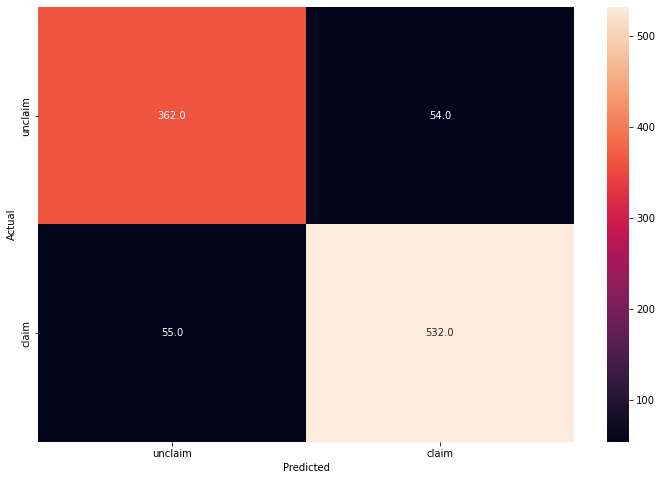

In [20]:
optimal_threshold_log = thresholds_lg[select_index]
y_pred_train_log = log_reg_model.predict_proba(X_train_std)

metrics_score(y_train, y_pred_train_log[:,1]>optimal_threshold_log)

#### Performance of test set (Logistic Regression, after adjust)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.92      0.89      0.90       196

    accuracy                           0.89       335
   macro avg       0.89      0.89      0.89       335
weighted avg       0.89      0.89      0.89       335



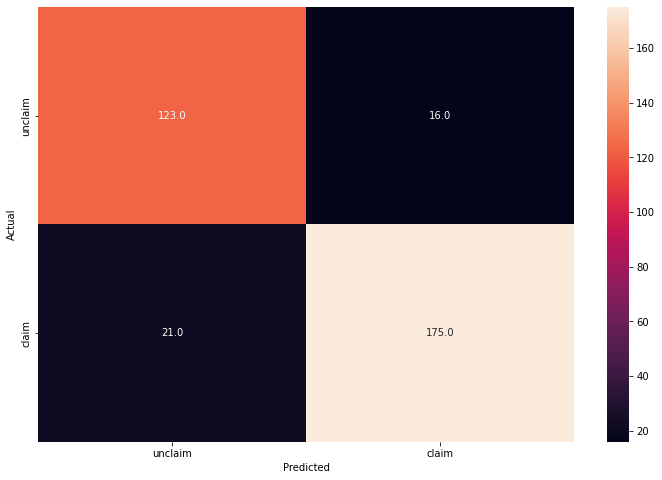

In [21]:
y_pred_test_log = log_reg_model.predict_proba(X_test_std)
metrics_score(y_test, y_pred_test_log[:,1]>optimal_threshold_log)

### SVM

In [22]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)

# tuning hyperparameters
parameters = {
        'class_weight': ["balanced", None],
        'kernel': ['linear', 'poly', 'rbf'], # since the solvers 'newton-cg' and 'lbfgs' can only deal with l2 penalty
        'C': [100, 10, 1.0, 0.1, 0.01]
        }

# scorer for tuning hyperparameters, here we use f1_score, but we can also use recall_score or precision_score
scorer = make_scorer(f1_score, pos_label = 1)

# grid search by 10-fold Cross-Validation 
gridCV = GridSearchCV(svm_model, parameters, scoring = scorer, cv = 10)
gridCV = gridCV.fit(X_train_std, y_train)

# get best model
svm_model = gridCV.best_estimator_

# fit
svm_model.fit(X_train_std, y_train)

SVC(C=10, kernel='poly', probability=True)

### Performance of train set (SVM)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       416
           1       0.95      0.94      0.94       587

    accuracy                           0.94      1003
   macro avg       0.93      0.93      0.93      1003
weighted avg       0.94      0.94      0.94      1003



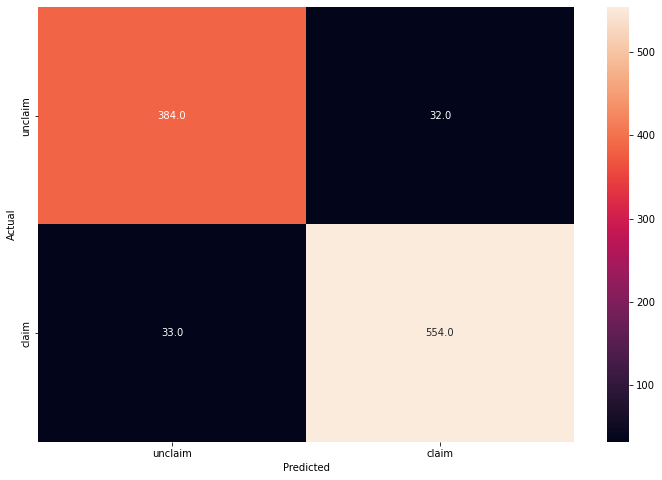

In [23]:
y_pred_train_svm = svm_model.predict(X_train_std)
metrics_score(y_train, y_pred_train_svm)

### Performance of test set (SVM)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       139
           1       0.92      0.89      0.90       196

    accuracy                           0.89       335
   macro avg       0.88      0.89      0.89       335
weighted avg       0.89      0.89      0.89       335



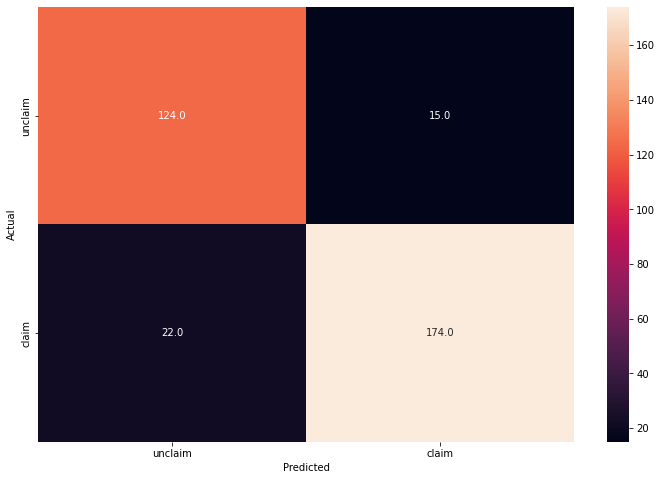

In [24]:
y_pred_test_svm = svm_model.predict(X_test_std)
metrics_score(y_test, y_pred_test_svm)

### Apply threshold to adjust the balance of precision and recall

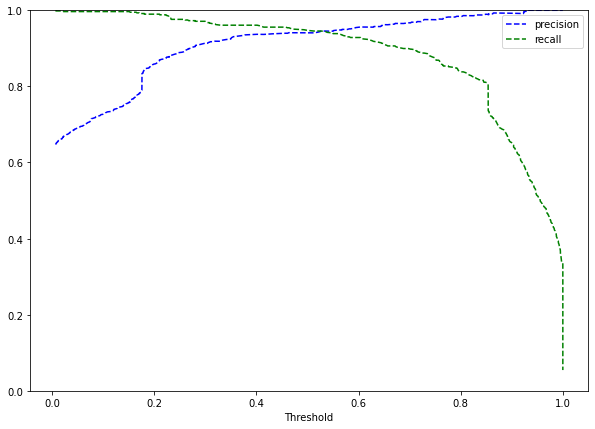

In [25]:
y_scores_svm = svm_model.predict_proba(X_train_std)
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Visualize the trade off between precision and recall
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

### Find the balance point of precision and recall

In [26]:
match_indices = abs(precisions_svm - recalls_svm) <= 0.000001
match_indices = np.where(match_indices == True)[0]
select_index = match_indices[match_indices.size//2]
print("The precision and recall match at about thresholds = ", thresholds_svm[select_index], ".")

The precision and recall match at about thresholds =  0.5269281397435488 .


### Performance of train set (SVM, after adjust)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       416
           1       0.81      0.93      0.86       587

    accuracy                           0.83      1003
   macro avg       0.84      0.81      0.82      1003
weighted avg       0.84      0.83      0.83      1003



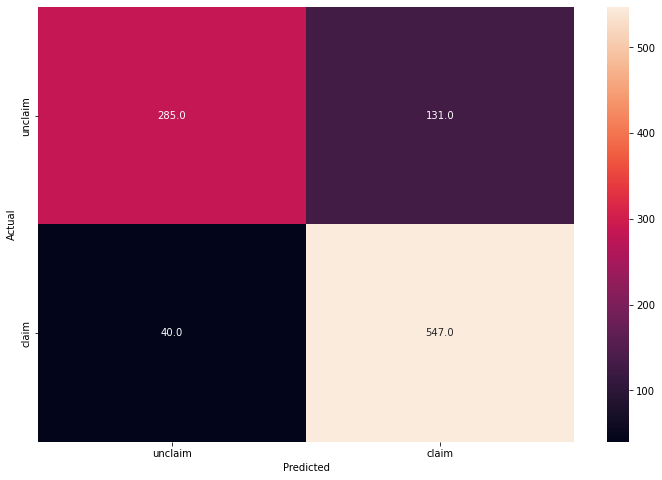

In [27]:
optimal_threshold_svm = thresholds_lg[select_index]
y_pred_train_svm = log_reg_model.predict_proba(X_train_std)

metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

### Performance of test set (SVM, after adjust)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       139
           1       0.83      0.93      0.88       196

    accuracy                           0.85       335
   macro avg       0.86      0.83      0.84       335
weighted avg       0.85      0.85      0.85       335



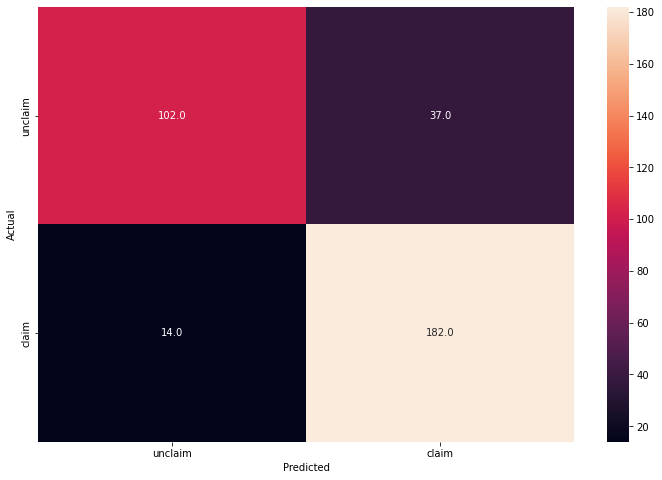

In [28]:
y_pred_test_svm = log_reg_model.predict_proba(X_test_std)
metrics_score(y_test, y_pred_test_svm[:,1]>optimal_threshold_svm)

### Dscision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# tuning hyperparameters
parameters = {
        'class_weight': ["balanced", None],
        'max_depth': range(3, 10),
        'min_samples_leaf': [5, 10, 20]
        }

# scorer for tuning hyperparameters, here we use f1_score, but we can also use recall_score or precision_score
scorer = make_scorer(f1_score, pos_label = 1)

# grid search by 10-fold Cross-Validation 
gridCV = GridSearchCV(dt_model, parameters, scoring = scorer, cv = 10)
gridCV = gridCV.fit(X_train, y_train)

# get best decision tree model
dt_model = gridCV.best_estimator_

dt_model.fit(X_train, y_train) # btw, decision doesn't need Standardization, so we don't use X_train_std

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=5)

### Performance of train set (decision tree)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       416
           1       0.99      0.98      0.99       587

    accuracy                           0.99      1003
   macro avg       0.98      0.99      0.98      1003
weighted avg       0.99      0.99      0.99      1003



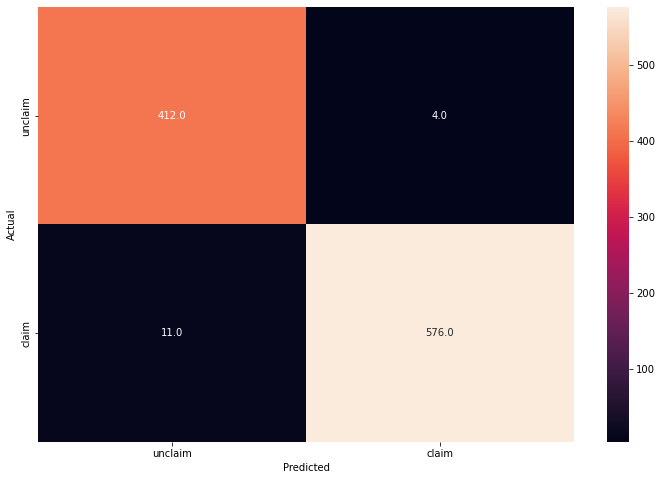

In [30]:
y_pred_train_dt = dt_model.predict(X_train)
metrics_score(y_train, y_pred_train_dt)

### Performance of test set (decision tree)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       139
           1       0.99      0.98      0.99       196

    accuracy                           0.99       335
   macro avg       0.98      0.99      0.98       335
weighted avg       0.99      0.99      0.99       335



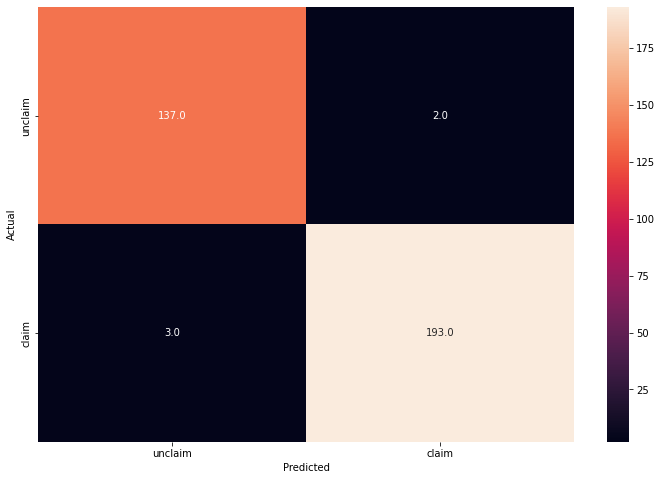

In [31]:
# Checking performance on the test dataset
y_pred_test_dt = dt_model.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

### Importance of each attribute in this model

<AxesSubplot:xlabel='Importance'>

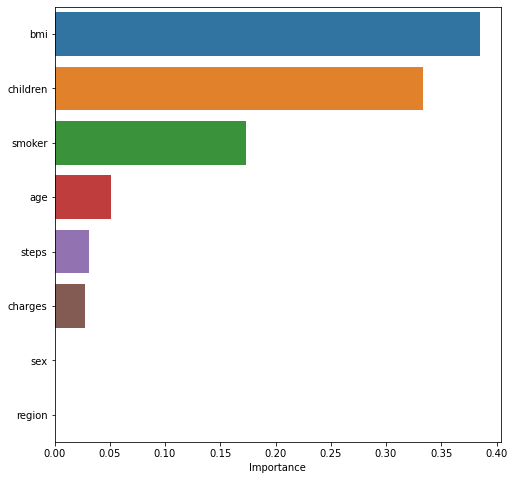

In [32]:
importances = dt_model.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(importance_df.Importance,importance_df.index)

### Visualize the decision tree

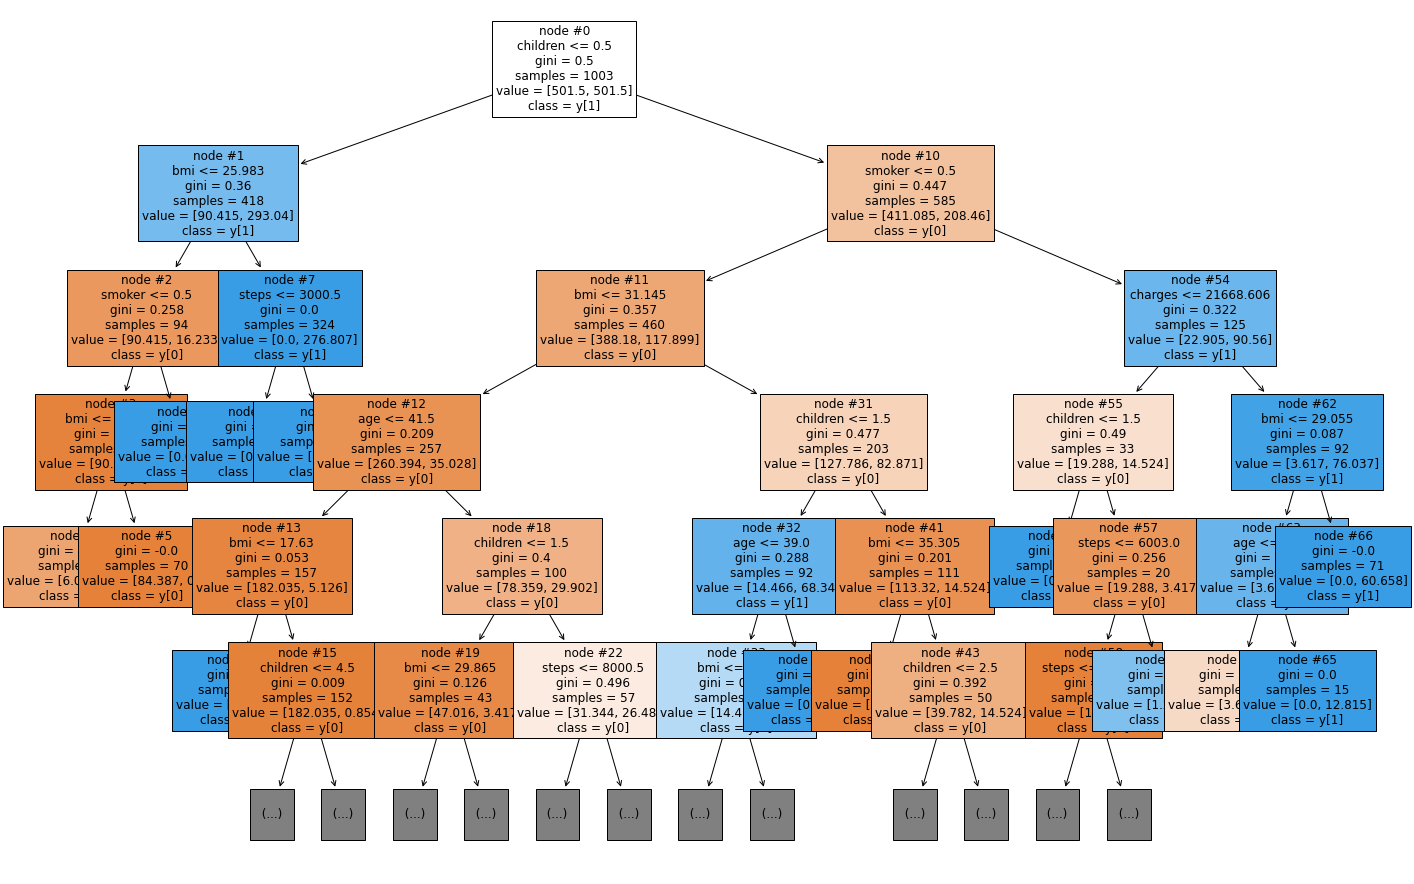

In [33]:
from sklearn import tree
features = list(X.columns)
plt.figure(figsize = (24, 16))
tree.plot_tree(dt_model, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = "balanced", random_state = 1)

# tuning hyperparameters
parameters = {
        'class_weight': ["balanced", None],
        "n_estimators": [100, 200],
        'min_samples_leaf': [5, 10, 20],
        "max_features": [0.7, 0.9, 'auto']
        }

# scorer for tuning hyperparameters, here we use f1_score, but we can also use recall_score or precision_score
scorer = make_scorer(f1_score, pos_label = 1)

# grid search by 10-fold Cross-Validation 
gridCV = GridSearchCV(rf_model, parameters, scoring = scorer, cv = 10)
gridCV = gridCV.fit(X_train, y_train)

# get best model
rf_model = gridCV.best_estimator_

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, min_samples_leaf=5, random_state=1)

### Performance of train set (Random Forest)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       416
           1       0.99      0.99      0.99       587

    accuracy                           0.99      1003
   macro avg       0.99      0.99      0.99      1003
weighted avg       0.99      0.99      0.99      1003



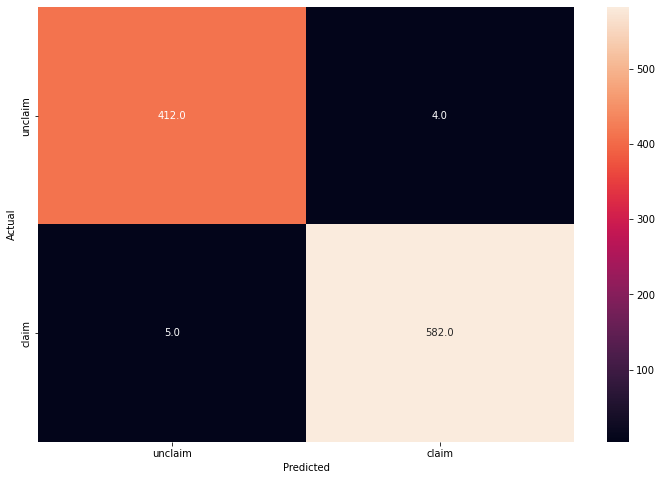

In [35]:
y_pred_train_rf = rf_model.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

### Performance of test set (Random Forest)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       139
           1       0.99      0.98      0.99       196

    accuracy                           0.99       335
   macro avg       0.99      0.99      0.99       335
weighted avg       0.99      0.99      0.99       335



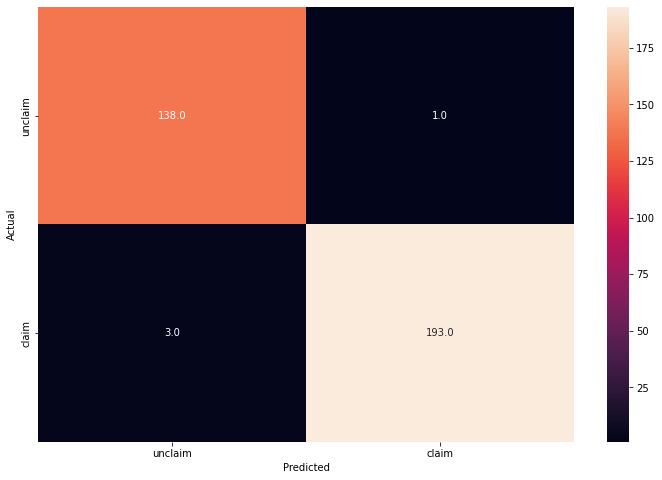

In [36]:
y_pred_test_rf = rf_model.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

### Importance of each column in this model

<AxesSubplot:xlabel='Importance'>

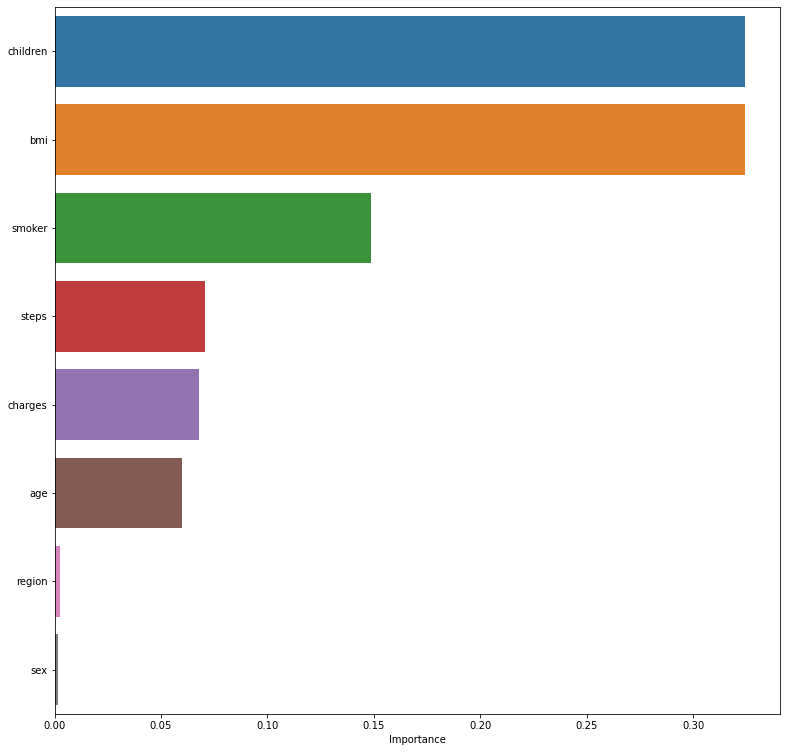

In [37]:
importances = rf_model.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(importance_df.Importance, importance_df.index)